# 농어 무게 예측(회귀) - k최근접 이웃 회귀, 선형회귀, 다중회귀

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

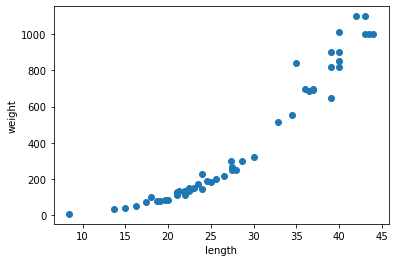

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# k최근접 이웃 회귀

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [4]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 함
## train_input, test_input을 2차원 배열로 변환

train_input = train_input.reshape(-1, 1)     # 크기에 -1을 사용하면 자동으로 나머지 원소 개수로 채움
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [6]:
print(knr.score(test_input, test_target))

0.992809406101064


- 위 결과를 결정계수(R^2)라고 함
- 예측값이 타깃값에 가까워질수록 결정계수는 1에 가까운 값이 됨

In [7]:
from sklearn.metrics import mean_absolute_error     # mean_absolute_error: 타깃과 예측의 절대값 오차를 평균하여 반환

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [8]:
print(knr.score(train_input, train_target))

0.9698823289099254


- train data의 점수가 test data의 점수보다 낮음 => 과소적합
- 이웃의 갯수를 줄이면 점수를 높일 수 있음

In [9]:
knr.n_neighbors = 3     # 이웃의 개수를 3으로 설정

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [10]:
print(knr.score(test_input, test_target))

0.9746459963987609


- test data의 점수가 train data의 점수보다 낮아짐 => 어느정도 괴소적합 해결

#### kneighborsRegressor의 문제는 값이 커져도 어느 정도 이상에서는 계속 같은 값으로 예측함

In [12]:
print(knr.predict([[50]]))

[1033.33333333]


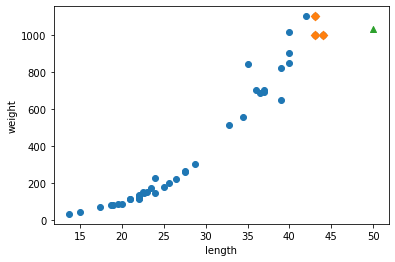

In [13]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [15]:
print(knr.predict([[100]]))

[1033.33333333]


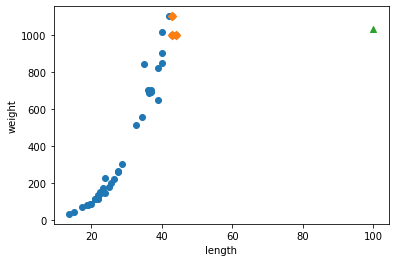

In [16]:
# 100cm의 농어도 여전히 1033.333으로 예측

distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형회귀

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [18]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


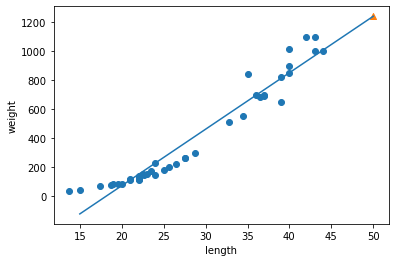

In [19]:
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항회귀

In [21]:
# 농어의 길이를 제곱해서 추가

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [22]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [23]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


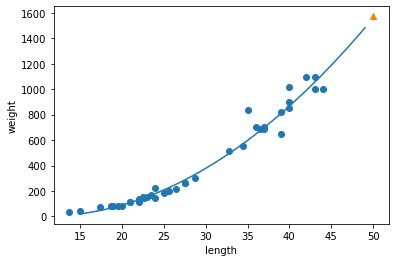

In [26]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 생성
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)

plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 다중회귀

In [28]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [29]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [30]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [33]:
# 특성 9개가 어떤 조합으로 만들어 졌는지 확인

poly.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [35]:
test_poly = poly.transform(test_input)

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

0.9903183436982124


In [37]:
print(lr.score(test_poly, test_target))

0.9714559911594203


In [38]:
# degree를 이용해 특성을 더 추가.(5제곱까지 추가)

poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [39]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.999999999997515


In [40]:
print(lr.score(test_poly, test_target))

-144.40196592191958


- 특성의 개수를 크게 늘리면 훈련 세트에 너무 과대적합 되서 테스트 세트의 점수는 매우 낮아짐

# 규제

In [41]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- 선형 회귀 모델에 규제를 추가한 모델 = 릿지(ridge), 라쏘(lasso)
- 릿지: 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘: 계수의 절대값을 기준으로 규제를 적용

# 릿지 회귀

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [43]:
print(ridge.score(test_scaled, test_target))

0.9790693977615398


In [44]:
# alpha값을 조정해서 규제의 강도를 조절. alpha값이 커지면 규제 강도도 커지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 함
# 적절한 alpha 값을 찾기 위해 alpha값에 대한 R^2값의 그래프 생성

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

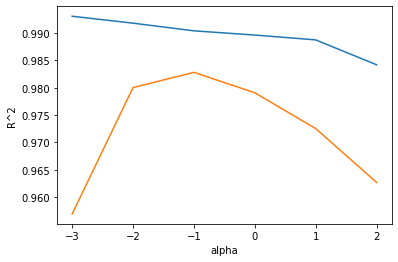

In [45]:
plt.plot(np.log10(alpha_list), train_score)     # alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그함수로 변환
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 파란색이 훈련세트, 주황색이 테스트세트 그래프
- 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 10의 -1승이므로 0.1

In [46]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570362
0.9827976465386904


# 라쏘 회귀

In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [48]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [49]:
# 최적의 alpha 값 찾기

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


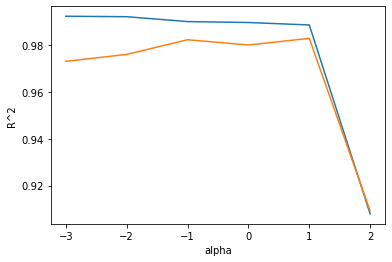

In [50]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 파란색: 훈련세트, 주황색: 테스트세트 그래프
- 라쏘 모델에서 최적의 alpha값은 1, 즉 10

In [51]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [52]:
# 라쏘 모델은 계수 값을 0으로 만들 수 있음
# 라쏘 모델의 계수는 coef_에 저장됨

print(np.sum(lasso.coef_ == 0))

40


- 55개의 특성 중 라쏘 모델이 사용한 특성은 15개